In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.shape

(200, 6)

In [5]:
df.Drug.value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [6]:
df.Sex.value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

In [7]:
df.BP.value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

In [8]:
df.Cholesterol.value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [9]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


C:\Users\Ashish.Ranjan\AppData\Local\Temp\ipykernel_3660\41057750.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Drug", data=df, palette="viridis", order=df['Drug'].value_counts().index)


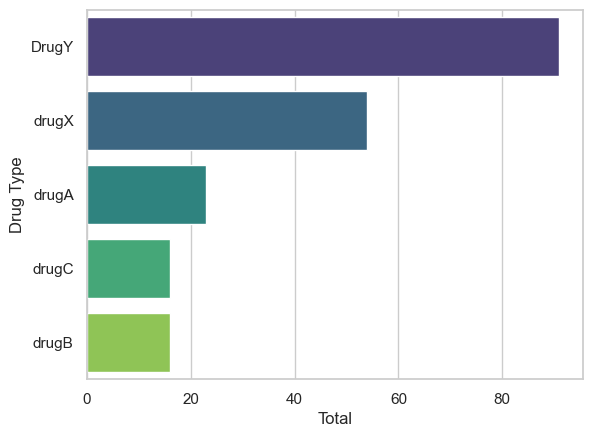

In [10]:
sns.set_theme(style="whitegrid")
sns.countplot(y="Drug", data=df, palette="viridis", order=df['Drug'].value_counts().index)
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()
     

C:\Users\Ashish.Ranjan\AppData\Local\Temp\ipykernel_3660\3696594887.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sex", data=df, palette="flare")


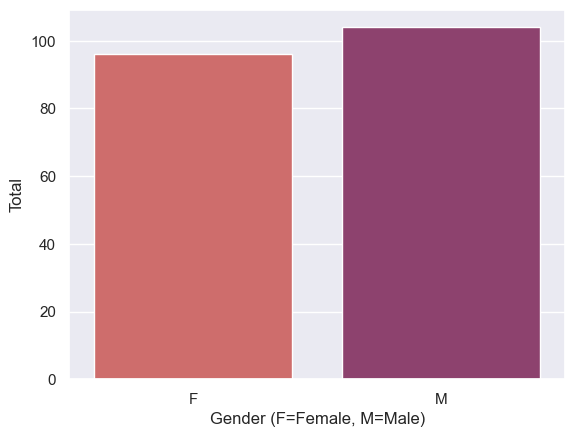

In [11]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Sex", data=df, palette="flare")
plt.xlabel('Gender (F=Female, M=Male)')
plt.ylabel('Total')
plt.show()

In [12]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [13]:
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']

In [14]:
NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [16]:
X = df.drop(["Drug"], axis=1)
y = df["Drug"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [17]:
X_train

,Age,Sex,BP,Cholesterol,Na_to_K
131,52,M,LOW,NORMAL,32.922
96,58,F,LOW,HIGH,38.247
181,59,F,NORMAL,HIGH,13.884
19,32,F,HIGH,NORMAL,25.974
153,72,F,LOW,NORMAL,14.642
...,...,...,...,...,...
67,17,M,NORMAL,NORMAL,10.832
192,72,M,LOW,HIGH,16.310
117,40,F,NORMAL,HIGH,10.103
47,68,M,LOW,HIGH,10.291


In [18]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
     
X_train = X_train.astype(int)
X_test = X_test.astype(int)
X_train.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
131,52,32,0,1,0,1,0,0,1
96,58,38,1,0,0,1,0,1,0
181,59,13,1,0,0,0,1,1,0
19,32,25,1,0,1,0,0,0,1
153,72,14,1,0,0,1,0,0,1


In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', max_iter=5000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
Acc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(Acc*100))
     

              precision    recall  f1-score   support

       DrugY       0.93      0.93      0.93        30
       drugA       1.00      0.80      0.89         5
       drugB       0.60      1.00      0.75         3
       drugC       1.00      0.75      0.86         4
       drugX       0.94      0.94      0.94        18

    accuracy                           0.92        60
   macro avg       0.90      0.89      0.87        60
weighted avg       0.93      0.92      0.92        60

[[28  0  1  0  1]
 [ 0  4  1  0  0]
 [ 0  0  3  0  0]
 [ 1  0  0  3  0]
 [ 1  0  0  0 17]]
Logistic Regression accuracy is: 91.67%


c:\Users\Ashish.Ranjan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


In [20]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=20)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))

              precision    recall  f1-score   support

       DrugY       0.94      0.97      0.95        30
       drugA       0.20      0.20      0.20         5
       drugB       0.25      0.33      0.29         3
       drugC       0.00      0.00      0.00         4
       drugX       0.65      0.72      0.68        18

    accuracy                           0.73        60
   macro avg       0.41      0.44      0.42        60
weighted avg       0.69      0.73      0.71        60

[[29  0  1  0  0]
 [ 0  1  0  0  4]
 [ 1  0  1  0  1]
 [ 0  2  0  0  2]
 [ 1  2  2  0 13]]
K Neighbours accuracy is: 73.33%


c:\Users\Ashish.Ranjan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Ashish.Ranjan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Ashish.Ranjan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

In [21]:
from sklearn.svm import SVC
model = SVC(kernel='linear', max_iter=251)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

       DrugY       1.00      0.97      0.98        30
       drugA       1.00      1.00      1.00         5
       drugB       0.75      1.00      0.86         3
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        18

    accuracy                           0.98        60
   macro avg       0.95      0.99      0.97        60
weighted avg       0.99      0.98      0.98        60

[[29  0  1  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
SVC accuracy is: 98.33%


c:\Users\Ashish.Ranjan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=251).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [22]:
from sklearn.naive_bayes import CategoricalNB
model = CategoricalNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Naive Bayes accuracy is: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

       DrugY       0.96      0.77      0.85        30
       drugA       0.36      0.80      0.50         5
       drugB       0.50      0.33      0.40         3
       drugC       0.67      1.00      0.80         4
       drugX       1.00      0.94      0.97        18

    accuracy                           0.82        60
   macro avg       0.70      0.77      0.70        60
weighted avg       0.88      0.82      0.83        60

[[23  5  0  2  0]
 [ 0  4  1  0  0]
 [ 0  2  1  0  0]
 [ 0  0  0  4  0]
 [ 1  0  0  0 17]]
Naive Bayes accuracy is: 81.67%


In [23]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_leaf_nodes=20)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        30
       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

[[30  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
Decision Tree accuracy is: 100.00%


In [24]:

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_leaf_nodes=30)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))


              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        30
       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

[[30  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
Random Forest accuracy is: 100.00%


In [25]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'SVM', 'Categorical NB'],
                        'Accuracy': [Acc*100, KNAcc*100, SVCAcc*100, NBAcc1*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,SVM,98.333333
0,Logistic Regression,91.666667
3,Categorical NB,81.666667
1,K Neighbors,73.333333


<Axes: xlabel='Model'>

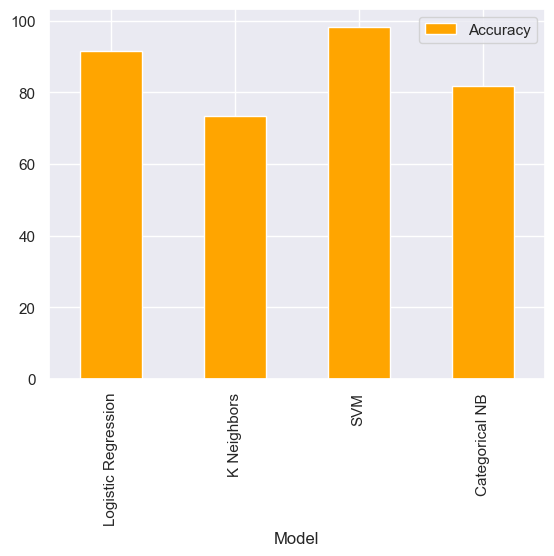

In [26]:
compare.plot(x='Model', y='Accuracy', kind='bar', color='orange')

In [27]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

c:\Users\Ashish.Ranjan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
# model = RandomForestClassifier(max_leaf_nodes=30)
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_leaf_nodes=30, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
import sklearn
print(sklearn.__version__)

ModuleNotFoundError: No module named 'sklearn'